# PROYECTO INTEGRADOR, SPRINT 7

En este proyecto se realizará un análisis sobre las ventas de videojuegos de las distintas plataformas tanto para las regiones de NA, EU, JP y otra categoría que agrupa distintos países. Adicionalmente se comparará tambien las ventas entre géneros y cómo han ido cambiando con el paso de los años. 

Se pretende recoger datos para una campaña de lanzamiento de videojuegos para el año 2017 mediante la selección de plataformas que sean rentables en los próximos años y las inclinaciones de los usuarios en cuanto a géneros.

In [1]:
#importar las librerías a usar 
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
from scipy import stats as st 

In [2]:
#leer archivo
df = pd.read_csv ('/datasets/games.csv')

## Análisis de la información general del dataset.

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## Preparación de Datos

In [7]:
#pasar el nombre de las columnas a minúsculas, para evitar errores de tipeo
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
#reemplazo los valores vacios de la columna year of release por la media obtenida mediante info para asi poder transformar la columna a int 
df['year_of_release'].fillna(2006,inplace = True)

- En este caso se reemplaza por la media ya que es una poca cantidad de datos en relación al total del dataframe y no va a afectar a nuestro análisis.

In [9]:
#convertir la columna year_of_release de float a int ya que solo se trabaja con el año y debe ser un entero 
df['year_of_release'] = df['year_of_release'].astype('int')

In [10]:
#se reemplaza la palabra tbd por nan para poder trasnformar esa columna a float en caso de requeir algún análisis numérico
df['user_score'] = df['user_score'].replace ('tbd', np.nan)

En este caso de reemplaza la determinacion tbd por un valor vacío ya que tbd para nuestro objetivo de análisis es lo mismo a que no se tenga puntuación del usuario. De esta manera se puede transformar la columna a float para poder trabajar con datos numéricos en caso de requerirlo. 

In [11]:
#trasnformo a float la columna user_score
df['user_score'] = df ['user_score'].astype('float')

In [12]:
#verifico que se haya realizado los cambios 
df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


- Para los valores ausentes, tanto name como genre se van a eliminar las 2 filas que no tienen información ya que no afecta a nuestro dataset 
- Las columnas critic score y user score serán rellenadas con un valor de -1 para poder identificarlos cuando se utilicen estas columnas y poder excluirlos de los cálculos. No se puede reemplazar por la media ya que es una cantidad significativa de datos ausentes. 
- La columa rating se rellenará con pendiente ya que al ser una columna cualitativa no afectara a ningún análisis. 

In [15]:
#se verifica que se han eliminado las columnas vacias para name y genre
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [14]:
#eliminar filas con valores ausentes de name y genre
df = df.dropna(subset=['name'])

In [16]:
#se rellena los datos nulos de critic score con el un valor de -1
df['critic_score'].fillna(-1, inplace = True)

In [17]:
#se rellena los nulos de la columna user score con un valor de -1 
df['user_score'].fillna(-1, inplace = True)

In [18]:
#se rellena los valores vacios de la columna rating con NaN
df['rating'].fillna('pendiente', inplace = True)

In [19]:
#se verifica que se haya rellenado correctamente
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [20]:
#se calcula las ventas totales para cada juego y se crea una nueva columna 
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [21]:
#se imprime nuevamente el dataset
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,pendiente,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,pendiente,31.38


## Análisis de Datos

In [22]:
#se analiza cuántos juegos fueron lanzados en cada año. Agrupo por año, sumo la cantidad de jugos por nombre. 
#Cambio el Nombre de las columnas 
count_per_year = df.groupby('year_of_release')['name'].count().reset_index()
count_per_year.columns = ['year_of_release', 'game_count']
print (count_per_year)

    year_of_release  game_count
0              1980           9
1              1981          46
2              1982          36
3              1983          17
4              1984          14
5              1985          14
6              1986          21
7              1987          16
8              1988          15
9              1989          17
10             1990          16
11             1991          41
12             1992          43
13             1993          60
14             1994         121
15             1995         219
16             1996         263
17             1997         289
18             1998         379
19             1999         338
20             2000         350
21             2001         482
22             2002         829
23             2003         775
24             2004         762
25             2005         939
26             2006        1275
27             2007        1197
28             2008        1427
29             2009        1426
30      

In [23]:
#identidicar las plataformas con mayor ventas, agrupando por plataforma y sumar ventas totales
df_platform =  df.groupby('platform')['total_sales'].sum().reset_index()
df_platform = df_platform.sort_values(by='total_sales', ascending=False)
df_platform 

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


- Se puede identificar que las plataformas significativas con mayores ventas son las 6 primeras: PS2, X360, PS3, Wii, DS, PS

In [24]:
#selecciono las plataformas con mayores ventas 
top_platforms = df_platform.head(6)['platform']

In [25]:
#filtro el dataframe para incluir solo las filtradas 
df_top_platforms = df[df['platform'].isin(top_platforms)]

In [26]:
#agrupo por año y plataforma y sumo las ventas para tener el dataset para el grafico 
top_platform_year = df_top_platforms.groupby (['year_of_release', 'platform'])['total_sales'].sum().reset_index()

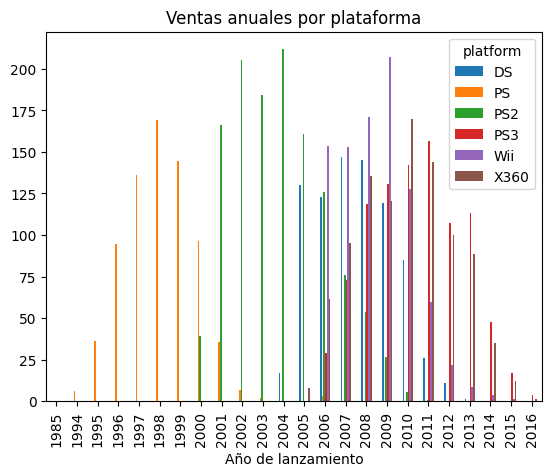

In [27]:
#creo una tabla pivote para poder crear el grafico de barras y genero el grafico  
pivot_table = top_platform_year.pivot (index = 'year_of_release', columns = 'platform', values = 'total_sales')
pivot_table.plot (kind = 'bar', xlabel = 'Año de lanzamiento', title = "Ventas anuales por plataforma")
plt.show()


- Al comparar las top plataformas con mayores ventas durante todos los años vs las ventas anuales de cada plataforma, se puede ver que la plataforma que más ventas ha generado siendo PS2, práctimanete desapareció en el año 2010. 
- Desde que las plataformas ingresan al mercado, pasan al rededor de 5 años para que lleguen a su máximo de ventas y tienden a tener una duración de presencia en el mercado de al rededor de 10 años desde que ingresan hasta que salen. Esto se da ya que como se puede ver con PS van sacando nuevas versiones como la 2 y la 3, lo que produce que los clientes dejen de comprar las versiones viejas. 
- Las distribuciones para las ventas anuales de cada plataforma parece que tienden a seguir una distribución normal. Lo que corrobora que conforme van saliendo nuevas nerviones o modelos, se van dejando de comprar las anteriores.
- Se puede ver que la mayor concentración de plataformas en el mercado se da en el año 2006 - 2007.

- Considerando que una plataforma está en el merdado al rededor de 10 años, pero que sus años de mayores ventas son de 5 años los datos que se tomarán son desde el año 2012 para analizar un periodo completo de mayores ventas de una plataforma. 
- Además desde este año se puede ver que se ha mantenido la cantidad de juegos que me han lanzado, por lo que se espera que el comportamiento sea igual para el 2017.

In [28]:
#se filtra el df original y se crea uno nuevo solo con información desde el año 2004 en adelante 
new_df = df[df['year_of_release']> 2011]

In [29]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   int64  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     2886 non-null   float64
 9   user_score       2886 non-null   float64
 10  rating           2886 non-null   object 
 11  total_sales      2886 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 293.1+ KB


In [30]:
#se verifica que el nuevo dataframe tenga datos desde el año 2012
new_df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000
mean,2013.916840,0.204771,0.175613,0.066729,0.054109,32.303881,3.050901,0.501223
std,1.411766,0.566696,0.505346,0.241575,0.164639,37.473265,3.979196,1.249157
min,2012.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.010000
25%,2013.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.040000
50%,2014.000000,0.030000,0.030000,0.010000,0.010000,-1.000000,3.500000,0.120000
75%,2015.000000,0.170000,0.140000,0.050000,0.040000,73.000000,7.100000,0.430000
max,2016.000000,9.660000,9.090000,4.390000,3.960000,97.000000,9.300000,21.050000


In [31]:
#identificar las plataformas líderes en ventas. y seleccionar solo esas
new_top_plat =  new_df.groupby('platform')['total_sales'].sum().reset_index()
new_top_plat = new_top_plat.sort_values(by='total_sales', ascending=False)
new_top_plat

,platform,total_sales
4,PS4,314.14
3,PS3,288.79
9,X360,236.54
0,3DS,194.61
10,XOne,159.32
8,WiiU,82.19
2,PC,62.65
6,PSV,49.18
7,Wii,35.37
1,DS,12.55


In [32]:
#selecciono las plataformas lideres en ventas
platforms2 = new_top_plat.head(5)['platform']
platforms2

4      PS4
3      PS3
9     X360
0      3DS
10    XOne
Name: platform, dtype: object

In [33]:
#nuevo dataframe solo con las plataformas lideres
sort_platforms = new_df[new_df['platform'].isin(platforms2)]

In [34]:
#Ver como han cambiado en los años las plataformas líderes en ventas. Crear una tabla pivote  
pivot_top_platforms = sort_platforms.pivot_table(index='year_of_release',values='total_sales',columns="platform",aggfunc='sum',fill_value=0)
pivot_top_platforms

platform,3DS,PS3,PS4,X360,XOne
year_of_release,,,,,
2012,51.36,107.36,0.00,99.74,0.00
2013,56.57,113.25,25.99,88.58,18.96
2014,43.76,47.76,100.00,34.74,54.07
2015,27.78,16.82,118.90,11.96,60.14
2016,15.14,3.60,69.25,1.52,26.15


- Las plataformas líderes en ventas desde el 2012 son PS4, PS3, X360, 3DS, XOne. Viendo las ventas por años, se puede decir que PS4 y XOne son las plataformas más rentables debido a sus ventas en el 2015 y lo que va del 2016 y que tan solo llevan 4 años en el mercado. X360 y PS3 son las que ventas más bajas están teniendo por lo que se podría pensar que están por salir del mercado. 

In [35]:
new_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,pendiente,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,pendiente,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


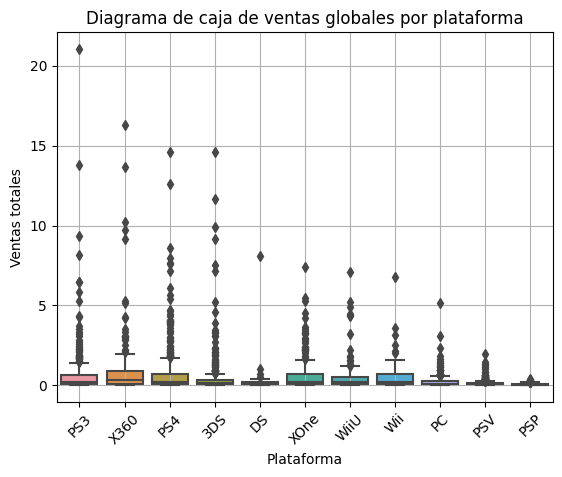

In [36]:
#diagrama de caja para las ventas globales de los juegos desglosado por plataforma 
sns.boxplot (data = new_df, x = 'platform', y = 'total_sales')
plt.title ('Diagrama de caja de ventas globales por plataforma')
plt.xlabel ('Plataforma')
plt.ylabel ('Ventas totales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

- Se puede ver en los diagramas de cajas que las ventas entre distintas plataformas son parecidas para la mayoría. Sin embargo existen plataformas que tienen una gran cantidad de valores atípicos, lo que en este caso quiere decir que son juegos que han tenido un grán éxito en el mercado para cada plataforma, y esto afecta las ventas promedio de las mismas. En este caso se puede ver que para la plataforma PS3, hubo un juego que tuvo la acogia más grande del mercado hasta el 2016. 
- La mediana de venta entre la mayoría de las plataformas parece ser muy cercana, todas son bajas, a excepto de X360 que levemente resalta sobre las demás. 

In [37]:
#reseñas de usuarios y profesionales frente a las ventas de la plataforma X360
#primero se filtra para excluir los valores de -1 con lo que se rellenó los vacíos y que no afecte al analisis
df_excluido = new_df.query('user_score != -1')

In [38]:
#se calcula los coeficientes de correlación entre las ventas de X360 con las reseñas de usuarios 
corr1 = df_excluido[df_excluido['platform'] == 'X360']
corr_u = corr1 ['user_score'].corr(corr1['total_sales'])
corr_u

0.006163978646213326

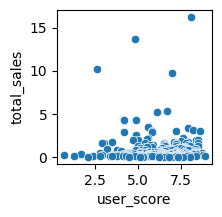

In [39]:
#diagrama de dispersion 
plt.figure (figsize = (2, 2))
sns.scatterplot (data = corr1, x = 'user_score', y = 'total_sales')
plt.show()

In [40]:
#se excluye los valores de -1 con lo que se relleno los vacios para que no afecte el analisis
df_excluido2 = new_df.query('critic_score != -1')

In [41]:
#se calcula los coeficientes de correlación entre las ventas de X360 con las reseñas de profesionales 
corr2 = df_excluido2[df_excluido2['platform'] == 'X360']
corr_p = corr2 ['critic_score'].corr(corr2['total_sales'])
corr_p

0.3605734888507336

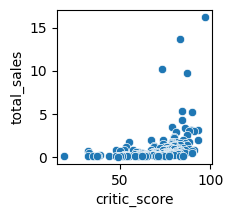

In [42]:
#diagrama de dispersion 
plt.figure (figsize = (2,2))
sns.scatterplot (data = corr2, x = 'critic_score', y = 'total_sales')
plt.show()

- En el caso de user score, se obtuvo un coeficiente de 0.00. Esto significa que no hay relación significativa entre user score y ventas totales. 
- En el caso de critic score, se obtuvo un coeficiente de correlación de 0.36, siendo una correlación positiva, pero baja. Esto quiere decir que si afecta en cierto modo la puntuación de profesionales. Mientras más alto es la puntuación de un profesional, más altas son las ventas. 

In [43]:
#comparación de los mismo juegos entre plataformas 
#se hace una tabla pivote para poder comparar y se saca una muestra de 20 para ver el comportamiento de un juego en las distintas plataformas. 
games_pivot = new_df.pivot_table(index='name',values='total_sales',columns="platform",aggfunc='sum',fill_value=0)
games_pivot.sample(20)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
name,,,,,,,,,,,
New Super Mario Bros. 2,9.90,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Doraemon: Nobita to Himitsu Dougu Hakubutsukan,0.07,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
The Last of Us,0.00,0.0,0.00,5.86,4.72,0.00,0.00,0.00,0.00,0.00,0.00
Battlezone,0.00,0.0,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00
Adventure Time: Explore the Dungeon Because I Don't Know!,0.14,0.0,0.00,0.04,0.00,0.00,0.00,0.00,0.03,0.08,0.00
Stellaris,0.00,0.0,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Epic Mickey 2: The Power of Two,0.00,0.0,0.00,0.47,0.00,0.00,0.00,0.95,0.23,0.51,0.00
Don Bradman Cricket 14,0.00,0.0,0.00,0.01,0.12,0.00,0.00,0.00,0.00,0.00,0.04
Taiko no Tatsujin: Chibi Dragon to Fushigi na Orb,0.63,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


- Alcomparar las ventas de un mismo juego entre las distintas plataformas, se puede evidenciar que para la gran mayoría, un juego está diseñado solo para la plataforma en la que el juego es lanzado, por lo que no se generan ventas de ese juego dentro de otra plataforma. Existen muy pocos casos en los que un mismo juego es utilizado por 2 distintas plataformas.

In [44]:
#distribución general de juegos por genero 
#se agrupa por genero y se suman las ventas totales para identificar los generos más vendidos
genre_df =  new_df.groupby('genre')['total_sales'].sum().reset_index()
top_genre = genre_df.sort_values(by='total_sales', ascending=False)
top_genre

,genre,total_sales
0,Action,441.12
8,Shooter,304.73
7,Role-Playing,192.80
10,Sports,181.07
3,Misc,85.04
4,Platform,61.00
6,Racing,53.50
2,Fighting,44.49
9,Simulation,35.12
1,Adventure,29.43


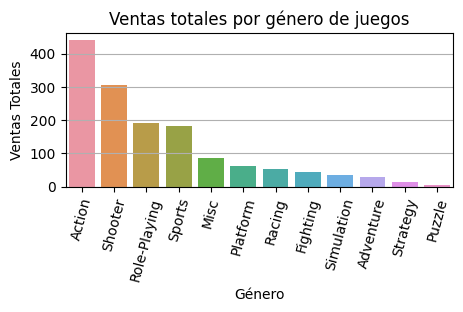

In [45]:
#se crea un gráfico de barras para una mejor visualización de los géneros más vendidos. 
plt.figure(figsize=(5, 2))
sns.barplot(data=top_genre, x='genre', y='total_sales')
plt.title ("Ventas totales por género de juegos")
plt.xlabel('Género')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=75)
plt.grid(axis='y')
plt.show()

- Los géneros más vendidos son: Action, Shooter, Role Playing, Sports, Misc.
- Se podría decir que los géneros más rentables son los que generan más adrenalina y los que tienes que ir contruyendo un personaje o completando misiones. Estos juegos permiten que el usuario se enganche a largo plazo y a su vez te dan la opción de jugar en línea lo cual favorece mucho para que otros usuarios adquieran estos juegos. 
- A comparación de los juegos menos vendidos, son juegos que facilmente se lo puede hacer desde un celular y que no generan la adrenalina necesaria para enchangar a nuevos clientes.

## Análisis por región para NA, EU, JP

### Región NA

In [46]:
new_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,pendiente,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,pendiente,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [47]:
# se identifica las 5 plataformas principales de la región NA
na_platform = new_df.groupby('platform')['na_sales'].sum().reset_index()
top_na_platform = na_platform.sort_values (by = 'na_sales', ascending = False)
top_na_platform

,platform,na_sales
9,X360,140.05
4,PS4,108.74
3,PS3,103.38
10,XOne,93.12
0,3DS,55.31
8,WiiU,38.10
2,PC,19.12
7,Wii,17.45
6,PSV,10.98
1,DS,4.59


- Las 5 principales plataformas en NA son X360, PS4, PS3, XOne, 3DS. Hasta ahí las ventas están entre los 90 y 150 mil. De ahí para abajo las ventas de cada plataforma bajan considerablemente. 

In [48]:
#se identifican los principales géneros 
na_genre = new_df.groupby('genre')['na_sales'].sum().reset_index()
top_na_genre = na_genre.sort_values (by = 'na_sales', ascending = False)
top_na_genre

,genre,na_sales
0,Action,177.84
8,Shooter,144.77
10,Sports,81.53
7,Role-Playing,64.00
3,Misc,38.19
4,Platform,25.38
2,Fighting,19.79
6,Racing,17.22
1,Adventure,8.92
9,Simulation,7.97


- Se puede ver que los principales 5 géneros de ventas en NA son los mismos que para las ventas globales. Estos son Action, Shooter, Role-Playing, Sports, Misc.

In [61]:
#gráfico para ver las ventas por ESRB 
#primero se excluye la categoría de "pendiente" que fue asignado a los valores vacios 
exclu = new_df.query("rating != 'pendiente'")

In [73]:
#se agrupa por rating y se suman las ventas de EU
rating = exclu.groupby(['year_of_release', 'rating'])['na_sales'].sum().reset_index()

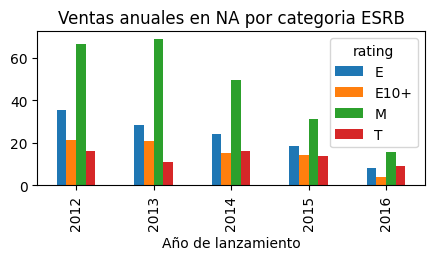

In [64]:
pivotna = rating.pivot (index = 'year_of_release', columns = 'rating', values = 'na_sales')
pivotna.plot (kind = 'bar', xlabel = 'Año de lanzamiento', title = "Ventas anuales en NA por categoria ESRB", figsize = (5, 2))
plt.show()

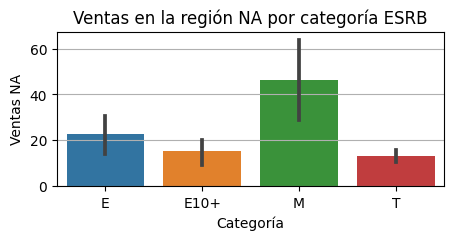

In [86]:
#se crea un gráfico de barras para una mejor visualización de las categorías más vendidas. 
plt.figure(figsize=(5, 2))
sns.barplot(data= rating, x='rating', y='na_sales')
plt.title ("Ventas en la región NA por categoría ESRB")
plt.xlabel('Categoría')
plt.ylabel('Ventas NA')
plt.grid(axis='y')
plt.show()

- Mediante el gráfico se puede ver que la mayor cantidad de ventas está en los juegos categorizados para "Maduro" que corresponde a mayores de 17+. Sin embargo las ventas para todas las categrías han ido disminuyendo con el paso de los años.

### Región EU

In [59]:
# se identifica las 5 plataformas principales de la región UE
eu_platform = new_df.groupby('platform')['eu_sales'].sum().reset_index()
top_eu_platform = eu_platform.sort_values (by = 'eu_sales', ascending = False)
top_eu_platform

,platform,eu_sales
4,PS4,141.09
3,PS3,106.86
9,X360,74.52
10,XOne,51.59
0,3DS,42.64
2,PC,37.76
8,WiiU,25.13
7,Wii,11.92
6,PSV,11.36
1,DS,3.53


- Para la región de EU, las 5 principales plataformas son PS4, PS3, X360, XOne y 3DS. Se puede ver que son las mismas que para NA, a diferencia del orden. En EU PS4 toma la posición de X360 en NA, casi con el mismo número de ventas. 

In [60]:
#se identifican los principales géneros 
eu_genre = new_df.groupby('genre')['eu_sales'].sum().reset_index()
top_eu_genre = eu_genre.sort_values (by = 'eu_sales', ascending = False)
top_eu_genre

,genre,eu_sales
0,Action,159.34
8,Shooter,113.47
10,Sports,69.09
7,Role-Playing,48.53
6,Racing,27.29
3,Misc,26.32
4,Platform,21.41
9,Simulation,14.55
2,Fighting,10.79
1,Adventure,9.46


- En cuanto a los géneros principales en EU, se mantienen los mismos que en NA, con la única diferencia que Racing entra en el top 5 en lugar de Misc.

In [69]:
#se identifica las ventas por ESRB
#se agrupa por rating y se suman las ventas de EU
ratingeu = exclu.groupby(['year_of_release', 'rating'])['eu_sales'].sum().reset_index()

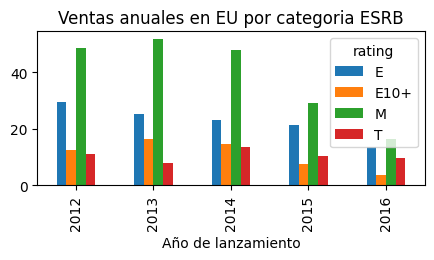

In [81]:
#se crea una tabla pivote y un gráfico de barras
pivoteu = ratingeu.pivot (index = 'year_of_release', columns = 'rating', values = 'eu_sales')
pivoteu.plot (kind = 'bar', xlabel = 'Año de lanzamiento', title = "Ventas anuales en EU por categoria ESRB", figsize = (5, 2))
plt.show()

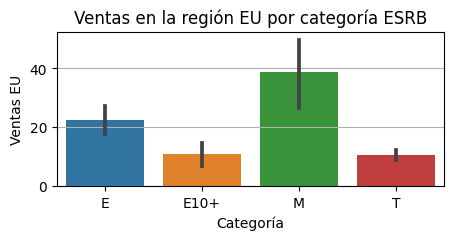

In [87]:
#se crea un gráfico de barras para una mejor visualización de las categorías más vendidas. 
plt.figure(figsize=(5, 2))
sns.barplot(data= ratingeu, x='rating', y='eu_sales')
plt.title ("Ventas en la región EU por categoría ESRB")
plt.xlabel('Categoría')
plt.ylabel('Ventas EU')
plt.grid(axis='y')
plt.show()

- Se puede observar que para EU, la categoría M o Mature 17+ también es la que mas ventas genera. Las otras categorías también se mantienen en el mismo orden de ventas generadas que para la región NA.


### Región JP

In [78]:
# se identifica las 5 plataformas principales de la región JP
jp_platform = new_df.groupby('platform')['jp_sales'].sum().reset_index()
top_jp_platform = jp_platform.sort_values (by = 'jp_sales', ascending = False)
top_jp_platform

,platform,jp_sales
0,3DS,87.79
3,PS3,35.29
6,PSV,21.04
4,PS4,15.96
8,WiiU,13.01
5,PSP,10.47
1,DS,3.72
7,Wii,3.39
9,X360,1.57
10,XOne,0.34


- A diferencia de las otras 2 regiones, para JP se puede ver que las ventas son menores en general. En esta región si cambian las principales 5, las cuales vienen a ser: 3DS como la primera, PS3, PSV, PS4 y WiiU, quedando por fuera Xbox.

In [79]:
#se identifican los principales géneros 
jp_genre = new_df.groupby('genre')['jp_sales'].sum().reset_index()
top_jp_genre = jp_genre.sort_values (by = 'jp_sales', ascending = False)
top_jp_genre

,genre,jp_sales
7,Role-Playing,65.44
0,Action,52.80
3,Misc,12.86
9,Simulation,10.41
2,Fighting,9.44
8,Shooter,9.23
4,Platform,8.63
1,Adventure,8.24
10,Sports,8.01
11,Strategy,2.88


- Para los géneros, también hay una diferencia entre los primeros 5. Estos son: Role-Playing, Action, Misc y Simulation y Fighting que no estaban entre las principales de las otras 2 regiones. 

In [84]:
#se identifica las ventas por ESRB
#se agrupa por rating y se suman las ventas de JP
ratingjp = exclu.groupby(['year_of_release', 'rating'])['jp_sales'].sum().reset_index()

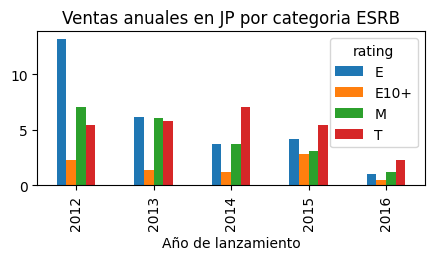

In [82]:
#se crea una tabla pivote y un gráfico de barras
pivotjp = ratingjp.pivot (index = 'year_of_release', columns = 'rating', values = 'jp_sales')
pivotjp.plot (kind = 'bar', xlabel = 'Año de lanzamiento', title = "Ventas anuales en JP por categoria ESRB", figsize = (5, 2))
plt.show()

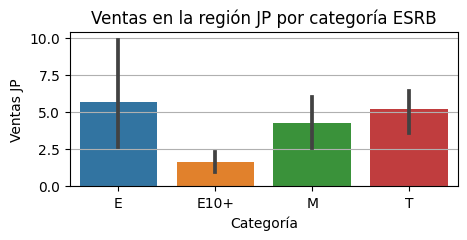

In [88]:
#se crea un gráfico de barras para una mejor visualización de las categorías más vendidas. 
plt.figure(figsize=(5, 2))
sns.barplot(data= ratingjp, x='rating', y='jp_sales')
plt.title ("Ventas en la región JP por categoría ESRB")
plt.xlabel('Categoría')
plt.ylabel('Ventas JP')
plt.grid(axis='y')
plt.show()

- A diferencia de las otras regiones, para JP la principal categoría vendida es E que significa "Todos", seguido de T que es "Adolecentes", la cual era una categoría con ventas bajas en las otras regiones. 

- Respecto a las principales plataformas con mayores ventas para las diferentes regiones, se pudo observar que tanto NA y EU tienen las mismas plataformas en el top 5 y que sus ventas en ambas regiones son similares. NA es la región que más ventas genera en total. Comparando con JP, se mantienen 3DS, PS3 y PS4 y las otras 2 son distintas. Se puede ver que las ventas en JP con significativamente menores que en las otras 2 regiones. 

- Para los géneros, al igual que con las plataformas, para NA y EU se mantienen casi los mismos géneros de preferencia, donde solo Racing toma la posición de Misc. Esta categorización se puede ver que es prácticamente la misma que se obtuvo para las ventas globales por género. Respecto a JP,los géneros simulation y fighting entran en el top 5 los cuales no estaban en las otras regiones. Se podría decir que la cultura entre estas regiones tiene una importancia considerable en cuanto a los gustos y gastos generados en videojuegos. 

- Respecto a las ventas por categorización de ESRB, al igual que en las anteriores 2, para NA y EU las ventas son similares para las categorías donde la mayor vendida es M que es "Maduro 17+". A diferencia de JP donde la principal categoría vendida es E que significa "Todos". Esto también se ve reflejado en la cultura y enseñanzas de dichas regiones. Donde NA y EU podrían llegar a compartir similitudes, cosa que no se puede decir con la región de JP.

## Prueba de hipótesis

### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Se define la hipóteis nula y alternativa 
- H0: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC con las mismas. 
- Ha: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son distintas. 

In [89]:
new_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,pendiente,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,pendiente,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [91]:
#Se crea una tabla solo con la información para la plataforma XOne. 
#Se utiliza el dataframe df_excluido donde ya se excluye los user_score de -1 que se relleno inicialmente.
xone = df_excluido[df_excluido['platform'] == 'XOne']
xone

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
373,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...
16544,Assassin's Creed Chronicles,XOne,2016,Action,0.00,0.01,0.00,0.00,-1.0,6.8,T,0.01
16597,Saints Row: Gat out of Hell,XOne,2015,Action,0.00,0.01,0.00,0.00,65.0,6.0,M,0.01
16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,-1.0,6.6,E,0.01


In [97]:
#se calcula la varianza de mi muestra para user_score de XOne
varianza1 = np.var(xone['user_score'])
print ('La varianza de user score para la plataforma XOne es:', varianza1)

La varianza de user score para la plataforma XOne es: 1.8965188383045526


In [98]:
#se calcula la desviacion estandar de XOne
XOne = xone.describe()
print ('La desviacion estandar de user score para la plataforma XOne es:',  XOne.loc ['std', 'user_score'])

La desviacion estandar de user score para la plataforma XOne es: 1.380940564592144


In [99]:
#Se crea una tabla solo con la información para la plataforma PC. 
#Se utiliza el dataframe df_excluido donde ya se excluye los user_score de -1 que se relleno inicialmente.
pc = df_excluido[df_excluido['platform'] == 'PC']
pc

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
192,Diablo III,PC,2012,Role-Playing,2.44,2.16,0.0,0.54,88.0,4.0,M,5.14
458,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
688,Guild Wars 2,PC,2012,Action,0.96,1.07,0.0,0.27,90.0,7.9,T,2.30
959,World of Warcraft: Mists of Pandaria,PC,2012,Role-Playing,0.84,0.76,0.0,0.22,82.0,4.8,T,1.82
1095,StarCraft II: Heart of the Swarm,PC,2013,Strategy,0.83,0.66,0.0,0.18,86.0,7.9,T,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16463,TrackMania Turbo,PC,2016,Action,0.00,0.01,0.0,0.00,79.0,6.8,E,0.01
16509,Ride 2,PC,2016,Racing,0.00,0.01,0.0,0.00,78.0,7.9,E,0.01
16518,Rugby World Cup 2015,PC,2015,Sports,0.00,0.01,0.0,0.00,-1.0,1.4,E,0.01
16584,Transformers: Fall of Cybertron,PC,2012,Action,0.01,0.00,0.0,0.00,78.0,7.9,T,0.01


In [100]:
#se calcula la varianza de mi muestra para user_score de PC
varianza2 = np.var(pc['user_score'])
print ('La varianza de user score para la plataforma PC es:', varianza2)

La varianza de user score para la plataforma PC es: 2.7569952398906588


In [101]:
#se calcula la desviacion estandar de PC para user_score
PC = pc.describe()
print ('La desviacion estandar de user score para la plataforma PC es:',  PC.loc ['std', 'user_score'])

La desviacion estandar de user score para la plataforma PC es: 1.6644650783835682


Al haber calculado las varianza y std para cada muestra, se puede decir que tienen diferentes varianzas. 

- Por esta razón se utilizará una prueba sobre igualdad de media de 2 poblaciones con varianza diferente. 
- Se establece un nivel de significancia de 0.05, ya que se considera que es lo suficientemente representativo para poder aceptar o rechazar la hipótesis nula. 

In [102]:
#se realiza la prueba ttest_ind
alpha = 0.05

results = st.ttest_ind (xone['user_score'], pc['user_score'], equal_var = False)
print ('valor p:', results.pvalue)

if (results.pvalue < alpha):
    print ('Rechazamos la hipótesis nula')
else:
    print ("No podemos rechazar la hipótesis nula")

valor p: 0.5489537965134912
No podemos rechazar la hipótesis nula


- Después de realizar la prueba de hipótesis, obtenemos un valor p alto de 0.54 lo que nos dice que no podemos rechazar la hipótesos nula. A pesar de que XOne y PC son 2 plataformas diferentes, las críticas de los usuarios son muy similares hacia las 2 plataformas. Eso puede ser ya que ambas tienen funcioanlidades similares.

### Las calificaciones promedio de los usuarios para los géneros Acción y Deportes son diferentes.

Se define la hipóteis nula y alternativa 

- H0: Las calificaciones promedio de los usuarios para los géneros acción y deportes son las mismas. 
- Ha: Las calificaciones promedio de los usuarios para las plataformas acción y deportes son distintas. 

In [105]:
#Se crea una tabla solo con la información para el género acción 
#Se utiliza el dataframe df_excluido donde ya se excluye los user_score de -1 que se relleno inicialmente.
action = df_excluido[df_excluido['genre'] == 'Action']
action

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
81,FIFA Soccer 13,PS3,2012,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17
127,Assassin's Creed III,PS3,2012,Action,2.64,2.52,0.16,1.12,85.0,6.9,M,6.44
...,...,...,...,...,...,...,...,...,...,...,...,...
16597,Saints Row: Gat out of Hell,XOne,2015,Action,0.00,0.01,0.00,0.00,65.0,6.0,M,0.01
16652,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81.0,8.5,E,0.01
16654,Ben 10 Omniverse 2,X360,2013,Action,0.00,0.01,0.00,0.00,-1.0,5.1,E10+,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,pendiente,0.01


In [106]:
#se calcula la varianza de mi muestra para user_score de acción
actionvar = np.var(action['user_score'])
print ('La varianza de user score para el género acción es:', actionvar)

La varianza de user score para el género acción es: 1.8854720340439224


In [110]:
#se calcula la desviacion estandar de acción para user_score
action1 = action.describe()
print ('La desviación estandar de user score para el género acción es:',  action1.loc ['std', 'user_score'])

La desviación estandar de user score para el género acción es: 1.3744395401161926


In [111]:
#Se crea una tabla solo con la información para el género deporte. 
#Se utiliza el dataframe df_excluido donde ya se excluye los user_score de -1 que se relleno inicialmente.
sports = df_excluido[df_excluido['genre'] == 'Sports']
sports

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
264,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,-1.0,4.5,E,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...
16146,Don Bradman Cricket 14,PS3,2014,Sports,0.00,0.01,0.00,0.00,73.0,6.9,E,0.01
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E,0.01
16450,Turbo: Super Stunt Squad,X360,2013,Sports,0.00,0.01,0.00,0.00,-1.0,4.5,E,0.01
16518,Rugby World Cup 2015,PC,2015,Sports,0.00,0.01,0.00,0.00,-1.0,1.4,E,0.01


In [112]:
#se calcula la varianza de mi muestra para user_score de deporte
sportvar = np.var(sports['user_score'])
print ('La varianza de user score para el género deporte es:', sportvar)

La varianza de user score para el género deporte es: 3.0073882971729127


In [115]:
#se calcula la desviacion estandar de deporte para user_score
sport1 = sports.describe()
print ('La desviación estandar de user score para el género deporte es:',  sport1.loc ['std', 'user_score'])

La desviación estandar de user score para el género deporte es: 1.7386461108301285


Al haber calculado las varianza y std para cada muestra, se puede decir que tienen diferentes varianzas. 

- Por esta razón se utilizará una prueba sobre igualdad de media de 2 poblaciones con varianza diferente. 
- Se establece un nivel de significancia de 0.05, ya que se considera que es lo suficientemente representativo para poder aceptar o rechazar la hipótesis nula. 

In [116]:
#se realiza la prueba ttest_ind
alpha = 0.05

results2 = st.ttest_ind (action['user_score'], sports['user_score'], equal_var = False)
print ('valor p:', results2.pvalue)

if (results2.pvalue < alpha):
    print ('Rechazamos la hipótesis nula')
else:
    print ("No podemos rechazar la hipótesis nula")

valor p: 4.24307776572644e-20
Rechazamos la hipótesis nula


- Después de realizar la prueba de hipótesis, se rechaza la hipótesis nula que mencionaba "Las calificaciones promedio de los usuarios para los géneros acción y deportes son las mismas". Lo que quiere decir que los usuarios tienen mayor preferencia sobre un género que otro. 

## Conclusión 

Después de realizar todos los análisis necesarios se puede concluir que: 
- Una plataforma tiene un ciclo de vida de al rededor de 5 años, razón por la cual se toman los datos desde el año 2012. 
- Las plataformas más rentables para crear una campaña para el 2017 respecto al crecimiento y ventas en los últimos 4 años son: PS4 y XOne. 
- La campaña debe ir enfocada principalmente en Estados Unidos, ya que es la región donde más ventas se generan anualmente, le sigue Europa y por último Japón. 
- Además las puntuaciones de los usuarios no afectan a las ventas totales de los diferentes juegos, sin embargo las puntuación de profesionales si son más consideradas por los usuarios al momento de hacer una compra.
- La campaña debería ir enfocada en juegos que generes adrenalina en los usuarios como aquellos de género acción que está en el top 5 de las 3 distintas regiones así como deporte y disparos que también generan un número de ventas significativo. 
- Como se pudo analizar, respecto a las críticas de los usuarios para la plataforma XOne y PC, presentan críticas muy similares y esto se puede deber a que son plataformas con funcionaliades muy amigables para los usuarios. Para los usuarios que utilizan PC, los juegos se desenvuelven correctamente y con facilidad que al final es lo que buscan de una plataforma. Lo mismo se puede decir para usuarios de XOne. 
- Finalmente, respecto a las críticas de usuarios en los géneros de deporte y acción se determinó que las críticas no son iguales. Se podría pensar que hay una preferencia de un género sobre otro. Para las 3 regiones, el género action es los que más ventas genera, esto podría ser un indicador de que tal vez los usuarios tienen gustos más inclinados hacia este género o también se podría d c